# Exercise Synopsys

Before opening their APIs to the public, CitiBank's Chief Digital Officer is keen in exploring new revenue streams to monetize the larges amount of data they've been historically collecting. He knows other financial institutions are doing business with their data, but he still needs to define specific use cases in which his credit card transaction data can add real value. As Senior Data Scientists, the CDO assigns you with the key task of exploring in depth the data stored in your data centers and make a solid assessment of the real value provided by it. You will present this business case in Citibank's annual convention. 

# Pip Installs

In [47]:
#!pip install plotly
#!pip install squarify
#!pip install geopandas

# Imports

In [48]:
from plotnine import *
from plotnine import ggplot, geom_map, aes, scale_fill_cmap, theme, labs
from plotnine.data import mpg
import pandas as pd
import numpy as np
import plotnine as p9
import squarify
%matplotlib inline
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.io as pio
import os
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

# Importing dataframe
    

In [49]:
df = pd.read_csv ("madrid_transactions.csv")

The dataset provided contains more than 10,000 credit card transactions performed by tourists in the city of Madrid during a month. CitiBank's DBA has already cleaned the file and uploaded it to the Campus Online, so you can solely focus on analyzing the different consumption patterns from tourists. The goal is to discover different insights from the data through data visualization (with GGPlot2) and then transform them into potential business outcomes. 

# Examples of Business Cases

- Is there a particular time in which tourists are buying?
- Which nationality has the highest average ticket and why?
- Is there any relationship between day of the week and consumption?
- Do high end fashion retailers need to focus more on attracting Australian visitors than on Chinese? Why? 

# Pandas EDA

### Making a backup of original dataframe

In [50]:
df_original = df.copy()

### Moving on with EDA

In [51]:
df.head()

,Unnamed: 0,amount,category,customer_country,daytime,hour,tx_date_proc,weekday
0,1,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00,thursday
1,2,59.97,Fashion & Shoes,GB,Afternoon,16,2012-03-02 16:12:52+00,friday
2,3,49.99,Fashion & Shoes,CN,Evening,17,2012-03-02 17:34:01+00,friday
3,4,5.95,Fashion & Shoes,GB,Evening,17,2012-03-01 17:43:29+00,thursday
4,5,16.65,Bars & restaurants,DK,Night,22,2012-03-01 22:47:52+00,thursday


In [52]:
df.tail()

,Unnamed: 0,amount,category,customer_country,daytime,hour,tx_date_proc,weekday
10788,10789,79.33,Bars & restaurants,IN,Night,21,2012-03-02 21:22:51+00,friday
10789,10790,77.70,Bars & restaurants,US,Night,22,2012-03-02 22:42:09+00,friday
10790,10791,48.25,Bars & restaurants,US,Midnight,23,2012-03-02 23:01:19+00,friday
10791,10792,368.90,Bars & restaurants,MY,Night,22,2012-03-02 22:35:46+00,friday
10792,10793,452.55,Bars & restaurants,CN,Afternoon,15,2012-03-01 15:27:26+00,thursday


In [53]:
df.describe()

,Unnamed: 0,amount,hour
count,10793.000000,10793.000000,10793.000000
mean,5397.000000,108.735644,15.032428
std,3115.815062,310.303331,4.809074
min,1.000000,0.040000,0.000000
25%,2699.000000,19.900000,12.000000
50%,5397.000000,39.990000,16.000000
75%,8095.000000,92.680000,18.000000
max,10793.000000,15000.000000,23.000000


Column Unnamed: 0 must be removed, it adds no value

In [54]:
del df['Unnamed: 0']

In [55]:
#columns are now clean
df.head(1)

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday
0,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00,thursday


In [56]:
#making sure we got thurdays and fridays consistent with column tx_date_proc
df.iloc[5700:5800,:]

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday
5700,24.95,Fashion & Shoes,GB,Mid morning,11,2012-03-02 11:33:21+00,friday
5701,54.90,Fashion & Shoes,FR,Mid morning,11,2012-03-02 11:47:53+00,friday
5702,219.60,Fashion & Shoes,BR,Mid morning,11,2012-03-02 11:50:50+00,friday
5703,52.90,Fashion & Shoes,IT,Mid morning,11,2012-03-02 11:51:50+00,friday
5704,29.90,Fashion & Shoes,TW,Afternoon,12,2012-03-02 12:00:04+00,friday
...,...,...,...,...,...,...,...
5795,25.98,Fashion & Shoes,FI,Afternoon,16,2012-03-02 16:06:40+00,friday
5796,97.75,Fashion & Shoes,FR,Afternoon,16,2012-03-02 16:08:00+00,friday
5797,18.85,Fashion & Shoes,SE,Afternoon,16,2012-03-02 16:09:14+00,friday
5798,67.00,Fashion & Shoes,US,Afternoon,16,2012-03-02 16:10:02+00,friday


### Feature engineering adjustment to have date and time separated

In [57]:
df.tx_date_proc = df.tx_date_proc.apply(pd.to_datetime)

In [58]:
df['Day'] = [d.date() for d in df['tx_date_proc']]
df['Time'] = [d.time() for d in df['tx_date_proc']]
df.tail(30)

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday,Day,Time
10763,17.15,Food,US,Night,22,2012-03-01 22:12:02+00:00,thursday,2012-03-01,22:12:02
10764,192.65,Other goods and services,NL,Midnight,23,2012-03-01 23:23:01+00:00,thursday,2012-03-01,23:23:01
10765,200.00,Bars & restaurants,IT,Midnight,23,2012-03-01 23:48:00+00:00,thursday,2012-03-01,23:48:00
10766,1172.22,Accommodation,US,Morning,6,2012-03-02 06:50:17+00:00,friday,2012-03-02,06:50:17
10767,69.95,Accommodation,US,Morning,7,2012-03-02 07:23:41+00:00,friday,2012-03-02,07:23:41
10768,90.15,Accommodation,CN,Mid morning,9,2012-03-02 09:57:36+00:00,friday,2012-03-02,09:57:36
10769,455.00,Accommodation,RU,Mid morning,10,2012-03-02 10:29:35+00:00,friday,2012-03-02,10:29:35
10770,394.00,Fashion & Shoes,CL,Mid morning,11,2012-03-02 11:15:57+00:00,friday,2012-03-02,11:15:57
10771,244.00,Fashion & Shoes,IL,Mid morning,11,2012-03-02 11:34:59+00:00,friday,2012-03-02,11:34:59
10772,21.60,Health,SE,Mid morning,11,2012-03-02 11:38:59+00:00,friday,2012-03-02,11:38:59


Dates are consistent with the thursdays and fridays

### Feature engineering adjustment to have continent

In [59]:
country_df = pd.read_csv("country-and-continent-codes-list.csv")

In [60]:
country_df.head(1)

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0


In [61]:
df = df.join(country_df.set_index('Two_Letter_Country_Code'), on = 'customer_country')


In [62]:
df.head(5)

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday,Day,Time,Continent_Name,Continent_Code,Country_Name,Three_Letter_Country_Code,Country_Number
0,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00:00,thursday,2012-03-01,21:51:54,Europe,EU,United Kingdom of Great Britain & Northern Ire...,GBR,826.0
1,59.97,Fashion & Shoes,GB,Afternoon,16,2012-03-02 16:12:52+00:00,friday,2012-03-02,16:12:52,Europe,EU,United Kingdom of Great Britain & Northern Ire...,GBR,826.0
2,49.99,Fashion & Shoes,CN,Evening,17,2012-03-02 17:34:01+00:00,friday,2012-03-02,17:34:01,Asia,AS,"China, People's Republic of",CHN,156.0
3,5.95,Fashion & Shoes,GB,Evening,17,2012-03-01 17:43:29+00:00,thursday,2012-03-01,17:43:29,Europe,EU,United Kingdom of Great Britain & Northern Ire...,GBR,826.0
4,16.65,Bars & restaurants,DK,Night,22,2012-03-01 22:47:52+00:00,thursday,2012-03-01,22:47:52,Europe,EU,"Denmark, Kingdom of",DNK,208.0


Expanded information about the country and continent

In [63]:
del df['Three_Letter_Country_Code']

In [64]:
del df['Country_Number']

In [65]:
df

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday,Day,Time,Continent_Name,Continent_Code,Country_Name
0,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00:00,thursday,2012-03-01,21:51:54,Europe,EU,United Kingdom of Great Britain & Northern Ire...
1,59.97,Fashion & Shoes,GB,Afternoon,16,2012-03-02 16:12:52+00:00,friday,2012-03-02,16:12:52,Europe,EU,United Kingdom of Great Britain & Northern Ire...
2,49.99,Fashion & Shoes,CN,Evening,17,2012-03-02 17:34:01+00:00,friday,2012-03-02,17:34:01,Asia,AS,"China, People's Republic of"
3,5.95,Fashion & Shoes,GB,Evening,17,2012-03-01 17:43:29+00:00,thursday,2012-03-01,17:43:29,Europe,EU,United Kingdom of Great Britain & Northern Ire...
4,16.65,Bars & restaurants,DK,Night,22,2012-03-01 22:47:52+00:00,thursday,2012-03-01,22:47:52,Europe,EU,"Denmark, Kingdom of"
...,...,...,...,...,...,...,...,...,...,...,...,...
10788,79.33,Bars & restaurants,IN,Night,21,2012-03-02 21:22:51+00:00,friday,2012-03-02,21:22:51,Asia,AS,"India, Republic of"
10789,77.70,Bars & restaurants,US,Night,22,2012-03-02 22:42:09+00:00,friday,2012-03-02,22:42:09,North America,NaN,United States of America
10790,48.25,Bars & restaurants,US,Midnight,23,2012-03-02 23:01:19+00:00,friday,2012-03-02,23:01:19,North America,NaN,United States of America
10791,368.90,Bars & restaurants,MY,Night,22,2012-03-02 22:35:46+00:00,friday,2012-03-02,22:35:46,Asia,AS,Malaysia


### Continue with Pandas EDA

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11324 entries, 0 to 10792
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   amount            11324 non-null  float64            
 1   category          11324 non-null  object             
 2   customer_country  11324 non-null  object             
 3   daytime           11324 non-null  object             
 4   hour              11324 non-null  int64              
 5   tx_date_proc      11324 non-null  datetime64[ns, UTC]
 6   weekday           11324 non-null  object             
 7   Day               11324 non-null  object             
 8   Time              11324 non-null  object             
 9   Continent_Name    11324 non-null  object             
 10  Continent_Code    9083 non-null   object             
 11  Country_Name      11324 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(9)
m

In [67]:
df.dtypes

amount                          float64
category                         object
customer_country                 object
daytime                          object
hour                              int64
tx_date_proc        datetime64[ns, UTC]
weekday                          object
Day                              object
Time                             object
Continent_Name                   object
Continent_Code                   object
Country_Name                     object
dtype: object

We converted the tx_date_proc column to a pure datetime64 format and added continents

In [68]:
df.columns

Index(['amount', 'category', 'customer_country', 'daytime', 'hour',
       'tx_date_proc', 'weekday', 'Day', 'Time', 'Continent_Name',
       'Continent_Code', 'Country_Name'],
      dtype='object')

In [69]:
report = ProfileReport(df, minimal=False)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Conclusions of Pandas profiling and Actions to be taken before EDA?

- Main nationality are Americans followed by French
- Created new features form date and time via split
- Most of sales go to fashion and shoes followed by restauration sector
- Apparently only records for two days, Thursdays and Fridays being the first predominant
- Most active hour seems to be around 18.00 and 19.00
- Have three redundant columns for time or date:
    - daytime
    - hour
    - tx_date_proc

# Start EDA with ggplot2

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11324 entries, 0 to 10792
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   amount            11324 non-null  float64            
 1   category          11324 non-null  object             
 2   customer_country  11324 non-null  object             
 3   daytime           11324 non-null  object             
 4   hour              11324 non-null  int64              
 5   tx_date_proc      11324 non-null  datetime64[ns, UTC]
 6   weekday           11324 non-null  object             
 7   Day               11324 non-null  object             
 8   Time              11324 non-null  object             
 9   Continent_Name    11324 non-null  object             
 10  Continent_Code    9083 non-null   object             
 11  Country_Name      11324 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(9)
m

## First chart: Heatmap

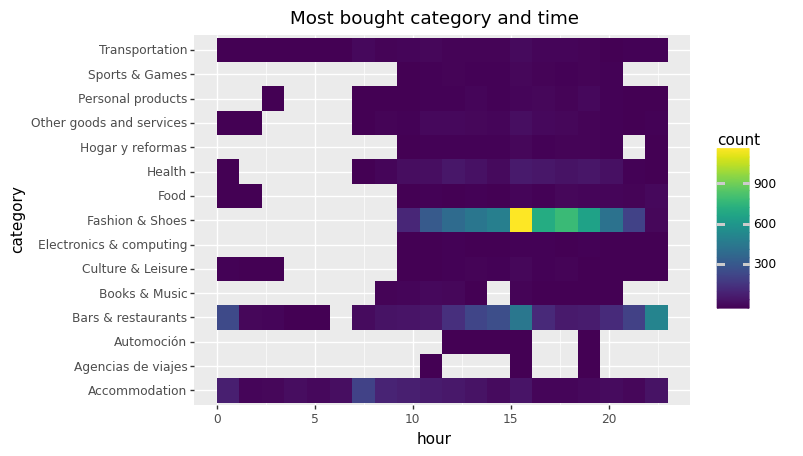

<ggplot: (96536843021)>

In [71]:
(ggplot(df)
     + aes('hour', 'category')
     + geom_bin2d(bins=20)
     + ggtitle("Most bought category and time")
)


- Bars and Restaurants have activity within Spanish lunch and dinner customs
- Fashion and shoes seem to skyrocket at 3 o clock

# Second chart treemap

In [72]:
#needs to be finetuned a bit..

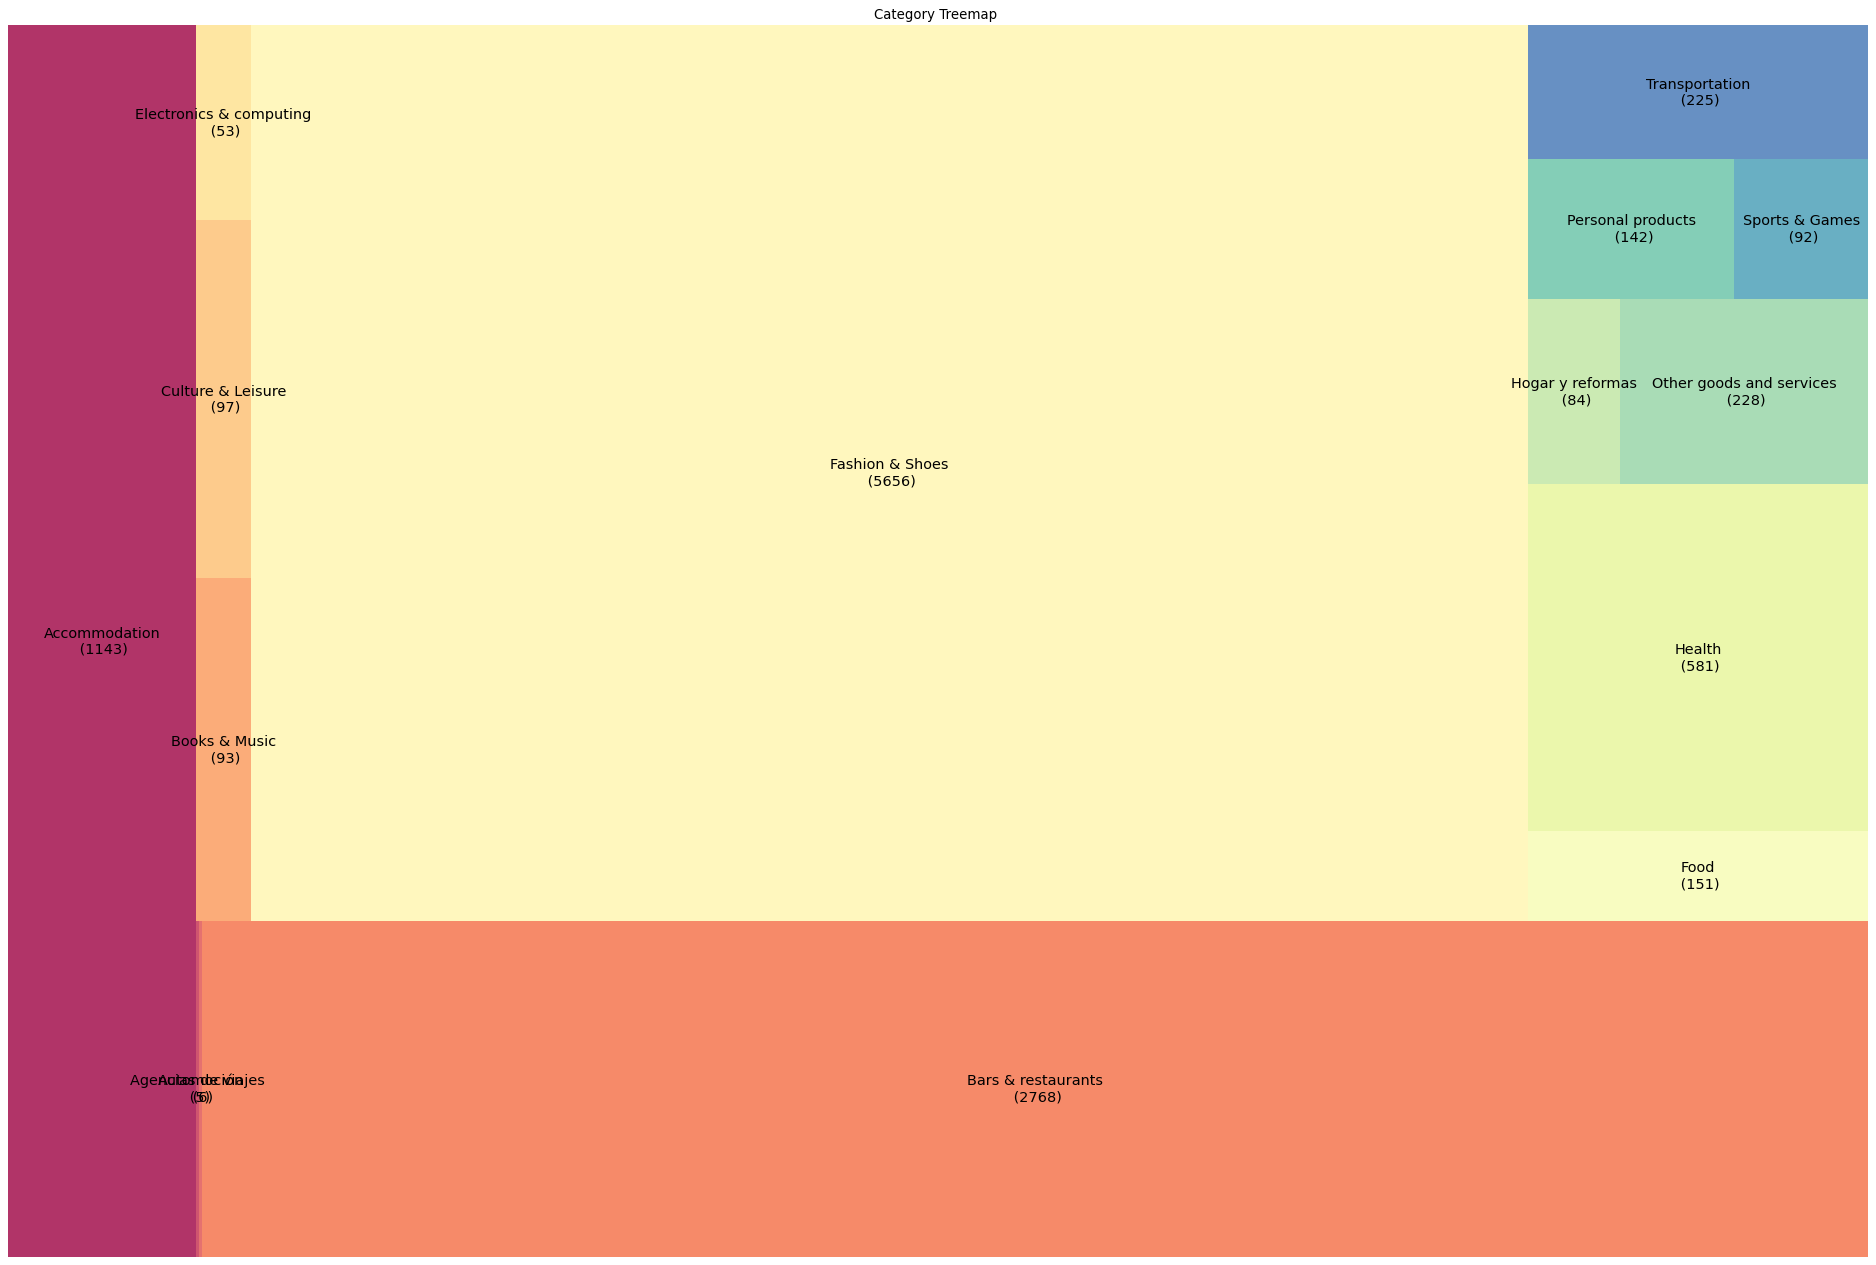

In [73]:

df2 = df.groupby('category').size().reset_index(name='counts')
labels = df2.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df2['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(30,20), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8,text_kwargs={'fontsize':13})

# Decorate
plt.title('Category Treemap ')
plt.axis('off')
plt.show()

## Drilled down to understand which sector is more demanded by which nationality

In [74]:
fig = px.treemap(df, path=[px.Constant("all"), 'category', 'customer_country'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### And viceversa

In [75]:
fig = px.treemap(df, path=[px.Constant("all"),'customer_country', 'category'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### And viceversa by continent

In [76]:
fig = px.treemap(df, path=[px.Constant("all"),'Continent_Name', 'category'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# Third chart: Pie Chart using the new continent feature engineered by joining a third party dataset

In [77]:
import plotly.graph_objects as go
values = df["Continent_Name"].value_counts()
labels = df["Continent_Name"].unique().tolist()

In [78]:
fig = go.Figure(data=[go.Pie(values=values, labels=labels, hole=.2)])

fig.show()
print(values)

Europe           5478
North America    2241
Asia             2212
South America    1112
Africa            210
Oceania            71
Name: Continent_Name, dtype: int64


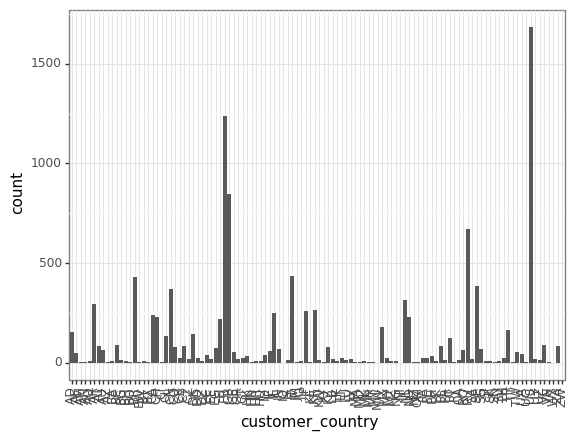

<ggplot: (96537340395)>

In [79]:


(p9.ggplot(data=df,
           mapping=p9.aes(x='customer_country'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)


# Fourth chart: Geographical plot

In [80]:

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
print("Geometry Column Name : ", world.geometry.name)
print("Dataset Size : ", world.shape)
world.head()

Geometry Column Name :  geometry
Dataset Size :  (177, 6)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [81]:
country_code = pd.read_csv ("all.csv")

In [82]:
country_code.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [83]:
countries = world.merge(country_code, left_on="iso_a3", right_on="alpha-3")

countries.head()

,pop_est,continent,name_x,iso_a3,gdp_md_est,geometry,name_y,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJ,FJI,242,ISO 3166-2:FJ,Oceania,Melanesia,NaN,9.0,54.0,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...","Tanzania, United Republic of",TZ,TZA,834,ISO 3166-2:TZ,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CA,CAN,124,ISO 3166-2:CA,Americas,Northern America,NaN,19.0,21.0,NaN
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,US,USA,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN


In [84]:
df3 = df.groupby('customer_country')['amount'].sum()



In [85]:
df3

customer_country
AD    10203.68
AE    14015.00
AM       56.00
AN      281.46
AO     2471.40
        ...   
VE     5512.65
VN     1503.45
WS       30.13
ZA     6878.96
ZW      127.00
Name: amount, Length: 110, dtype: float64

In [86]:
sales_df = countries.merge(df3, left_on="alpha-2", right_on="customer_country")


In [87]:
sales_df

,pop_est,continent,name_x,iso_a3,gdp_md_est,geometry,name_y,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,amount
0,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CA,CAN,124,ISO 3166-2:CA,Americas,Northern America,NaN,19.0,21.0,NaN,26154.26
1,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,US,USA,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN,184196.77
2,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,KZ,KAZ,398,ISO 3166-2:KZ,Asia,Central Asia,NaN,142.0,143.0,NaN,14441.38
3,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,UZ,UZB,860,ISO 3166-2:UZ,Asia,Central Asia,NaN,142.0,143.0,NaN,675.18
4,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,ID,IDN,360,ISO 3166-2:ID,Asia,South-eastern Asia,NaN,142.0,35.0,NaN,13953.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,100388073.0,Africa,Egypt,EGY,303092,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",Egypt,EG,EGY,818,ISO 3166-2:EG,Africa,Northern Africa,NaN,2.0,15.0,NaN,6967.08
98,44269594.0,Africa,Uganda,UGA,35165,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...",Uganda,UG,UGA,800,ISO 3166-2:UG,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,324.90
99,3301000.0,Europe,Bosnia and Herz.,BIH,20164,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",Bosnia and Herzegovina,BA,BIH,70,ISO 3166-2:BA,Europe,Southern Europe,NaN,150.0,39.0,NaN,317.21
100,2083459.0,Europe,North Macedonia,MKD,12547,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,MK,MKD,807,ISO 3166-2:MK,Europe,Southern Europe,NaN,150.0,39.0,NaN,207.90


C:\Users\pedro\anaconda3\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning:

Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it



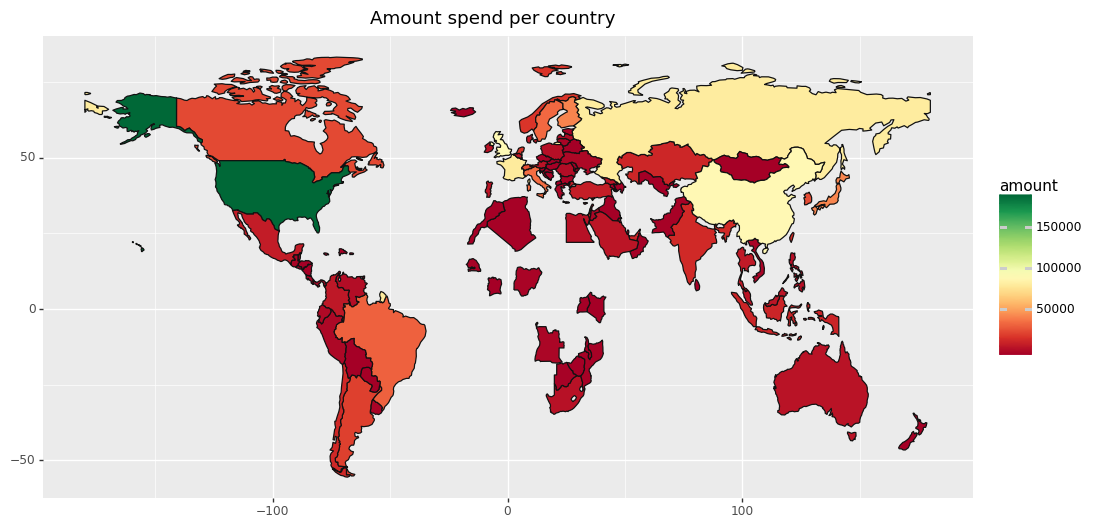

<ggplot: (96535311607)>

### Seaborn graphics, matrix

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11324 entries, 0 to 10792
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   amount            11324 non-null  float64            
 1   category          11324 non-null  object             
 2   customer_country  11324 non-null  object             
 3   daytime           11324 non-null  object             
 4   hour              11324 non-null  int64              
 5   tx_date_proc      11324 non-null  datetime64[ns, UTC]
 6   weekday           11324 non-null  object             
 7   Day               11324 non-null  object             
 8   Time              11324 non-null  object             
 9   Continent_Name    11324 non-null  object             
 10  Continent_Code    9083 non-null   object             
 11  Country_Name      11324 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(9)
m

In [90]:
table2 = pd.pivot_table(df, values='amount', index='category',columns=['weekday'], aggfunc=np.mean, fill_value=0)

In [91]:
table2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Accommodation to Transportation
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   friday     15 non-null     float64
 1   thursday   15 non-null     float64
dtypes: float64(2)
memory usage: 360.0+ bytes


In [92]:
table2.reset_index(inplace=True)

In [93]:
table3 = table2.rename(columns = {'index':'category'})

In [94]:
table3.columns

Index(['category', 'friday   ', 'thursday '], dtype='object', name='weekday')

In [95]:
table3.columns = table3.columns.str.replace(' ', '')

In [96]:
table3.columns

Index(['category', 'friday', 'thursday'], dtype='object', name='weekday')

In [97]:
df5 = df.groupby(['category', 'weekday']).mean("amount")

In [98]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 29 entries, ('Accommodation', 'friday   ') to ('Transportation', 'thursday ')
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   amount  29 non-null     float64
 1   hour    29 non-null     float64
dtypes: float64(2)
memory usage: 771.0+ bytes


In [99]:
df10 = df5.reset_index()

In [100]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  29 non-null     object 
 1   weekday   29 non-null     object 
 2   amount    29 non-null     float64
 3   hour      29 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.0+ KB


In [101]:
df10.index = list(df10.index)

In [102]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  29 non-null     object 
 1   weekday   29 non-null     object 
 2   amount    29 non-null     float64
 3   hour      29 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11324 entries, 0 to 10792
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   amount            11324 non-null  float64            
 1   category          11324 non-null  object             
 2   customer_country  11324 non-null  object             
 3   daytime           11324 non-null  object             
 4   hour              11324 non-null  int64              
 5   tx_date_proc      11324 non-null  datetime64[ns, UTC]
 6   weekday           11324 non-null  object             
 7   Day               11324 non-null  object             
 8   Time              11324 non-null  object             
 9   Continent_Name    11324 non-null  object             
 10  Continent_Code    9083 non-null   object             
 11  Country_Name      11324 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(9)
m

In [104]:
df11 = df10.pivot(index='category',columns='weekday',values='amount')

In [105]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Accommodation to Transportation
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   friday     15 non-null     float64
 1   thursday   14 non-null     float64
dtypes: float64(2)
memory usage: 360.0+ bytes


C:\Users\pedro\anaconda3\lib\site-packages\mizani\palettes.py:396: UserWarning:

Warning message:Brewer palette Paired has a maximum of 12 colors Returning the palette you asked for with that many colors

C:\Users\pedro\anaconda3\lib\site-packages\mizani\palettes.py:396: UserWarning:

Warning message:Brewer palette Paired has a maximum of 12 colors Returning the palette you asked for with that many colors



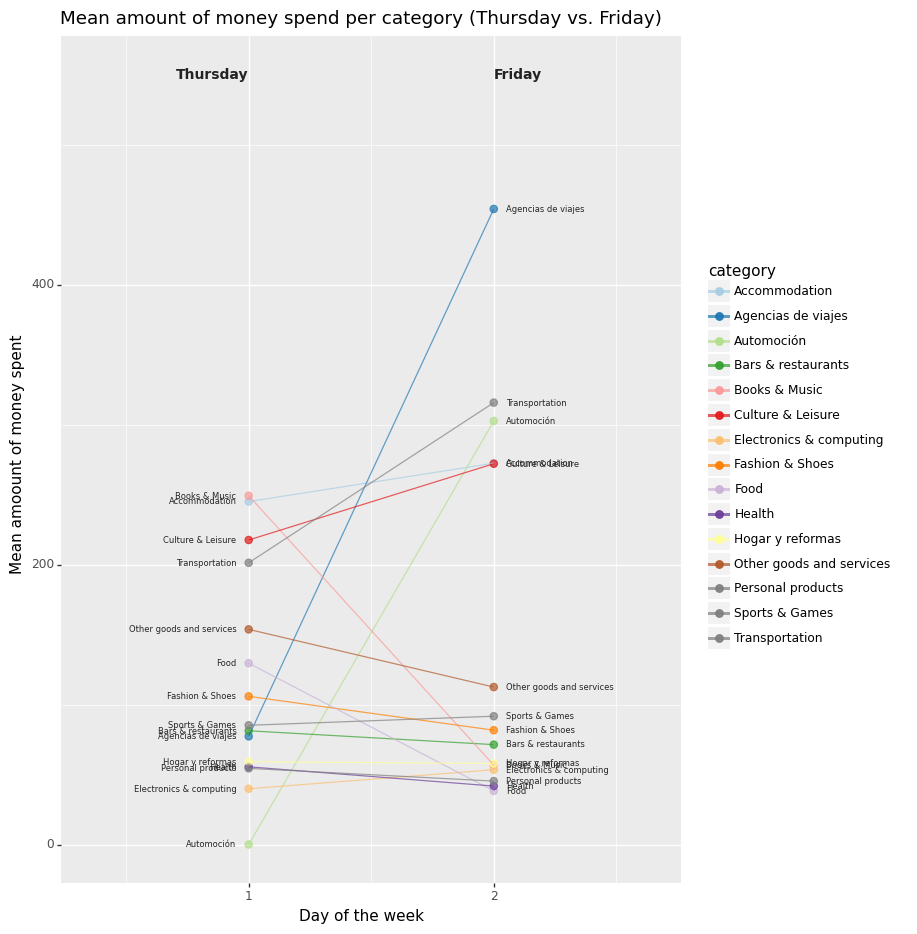

<ggplot: (96537199948)>

In [106]:
# Text colors
black1 = '#252525'
black2 = '#222222'

# Gallery Plot

(ggplot(table3)
 # Slight modifications for the original lines,
 # 1. Nudge the text to either sides of the points
 # 2. Alter the color and alpha values
 + geom_text(aes(1, 'thursday', label='category'), nudge_x=-0.05, ha='right', size=6, color=black1)
 + geom_text(aes(2, 'friday', label='category'), nudge_x=0.05, ha='left', size=6, color=black1)
 + geom_point(aes(1, 'thursday', color='category'), size=2.5, alpha=.7)
 + geom_point(aes(2, 'friday', color='category'), size=2.5, alpha=.7)
 + geom_segment(aes(x=1, y='thursday', xend=2, yend='friday', color='category'), alpha=.7)

 # Text Annotations
 + annotate('text', x=1, y=550, label='Thursday', fontweight='bold', ha='right', size=10, color=black2)
 + annotate('text', x=2, y=550, label='Friday', fontweight='bold', ha='left', size=10, color=black2)



 # Prevent  names from being chopped off
 + lims(x=(0.35, 2.65))
 + labs(color='category')
 +labs(title="Mean amount of money spend per category (Thursday vs. Friday)",
        x ="Day of the week", y = "Mean amoount of money spent")
 # Change colors
 + scale_color_brewer(type='qual', palette=3)
 # Changing the figure size prevents the country names from squishing up
 + theme(figure_size=(8, 11))
)

